In [1]:
from google.colab import files
uploaded = files.upload()

Saving Case Study Chapter 3 Topic 3_ Dataset Kebotakan (Not Clean).csv to Case Study Chapter 3 Topic 3_ Dataset Kebotakan (Not Clean).csv


In [2]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['Case Study Chapter 3 Topic 3_ Dataset Kebotakan (Not Clean).csv']))

In [3]:
df.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7832 non-null   float64
 1   jenis_kelamin  7840 non-null   object 
 2   pekerjaan      7760 non-null   object 
 3   provinsi       7831 non-null   object 
 4   gaji           7843 non-null   float64
 5   is_menikah     7845 non-null   float64
 6   is_keturunan   7828 non-null   float64
 7   berat          7861 non-null   float64
 8   tinggi         7843 non-null   float64
 9   sampo          7858 non-null   object 
 10  is_merokok     7847 non-null   float64
 11  pendidikan     7847 non-null   object 
 12  stress         7853 non-null   float64
 13  botak_prob     7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.0+ KB


In [5]:
df.isnull().sum()

umur              85
jenis_kelamin     77
pekerjaan        157
provinsi          86
gaji              74
is_menikah        72
is_keturunan      89
berat             56
tinggi            74
sampo             59
is_merokok        70
pendidikan        70
stress            64
botak_prob        79
dtype: int64

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

In [7]:
df['is_menikah'] = df.apply(lambda x: x['umur'] > 30 if np.isnan(x['is_menikah']) else x['is_menikah'], axis=1)
df['is_keturunan'].fillna(0, inplace=True)
df['is_merokok'].fillna(1, inplace=True)

df['umur'].fillna(df['umur'].mean(), inplace=True)
df['gaji'].fillna(df['gaji'].mean(), inplace=True)
df['tinggi'].fillna(df['berat'].mean(), inplace=True)
df['berat'].fillna(df['tinggi'].mean(), inplace=True)
df['stress'].fillna(df['stress'].mean(), inplace=True)

In [8]:
df['jenis_kelamin'].fillna(df['jenis_kelamin'].mode()[0], inplace=True)
df['provinsi'].fillna(df['provinsi'].mode()[0], inplace=True)
df['sampo'].fillna(df['sampo'].mode()[0], inplace=True)
df['pendidikan'].fillna(df['pendidikan'].mode()[0], inplace=True)
df['pekerjaan'].fillna(df['pekerjaan'].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

umur              0
jenis_kelamin     0
pekerjaan         0
provinsi          0
gaji              0
is_menikah        0
is_keturunan      0
berat             0
tinggi            0
sampo             0
is_merokok        0
pendidikan        0
stress            0
botak_prob       79
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

umur             0
jenis_kelamin    0
pekerjaan        0
provinsi         0
gaji             0
is_menikah       0
is_keturunan     0
berat            0
tinggi           0
sampo            0
is_merokok       0
pendidikan       0
stress           0
botak_prob       0
dtype: int64

In [12]:
df

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,32.0,Laki-laki,Pegawai swasta,Yogyakarta,6.024409e+06,1.0,0.0,44.432438,154.578859,Deadbuoy,0.0,SMA,9.0,0.471229
7913,34.0,Laki-laki,Pegawai swasta,Manado,1.007043e+07,1.0,0.0,49.389914,158.782726,Shoulder & Head,1.0,S1,9.0,0.543821
7914,58.0,Laki-laki,Freelance,Mamuju,8.010815e+06,1.0,0.0,54.351968,154.478087,Deadbuoy,1.0,S2,6.0,0.643453
7915,30.0,Laki-laki,PNS,Palu,9.059906e+06,1.0,0.0,57.646930,163.377717,Deadbuoy,0.0,S1,10.0,0.540056


In [13]:
df.duplicated().sum()

81

In [14]:
df.drop_duplicates(inplace=True)

<ipython-input-14-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [15]:
df.duplicated().sum()

0

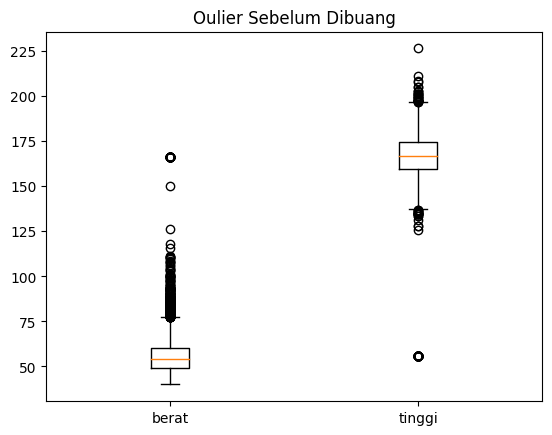

Jumlah baris dengan outlier: 7757


In [16]:
kolom_numerik = ['berat', 'tinggi']
plt.boxplot(df[kolom_numerik])
plt.xticks([1, 2], kolom_numerik)
plt.title('Oulier Sebelum Dibuang')
plt.show()
print(f'Jumlah baris dengan outlier: {df.shape[0]}')

In [17]:
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[kolom_numerik] < (Q1 - 1.5 * IQR)) | (df[kolom_numerik] > (Q3 + 1.5 * IQR))).any(axis=1)]

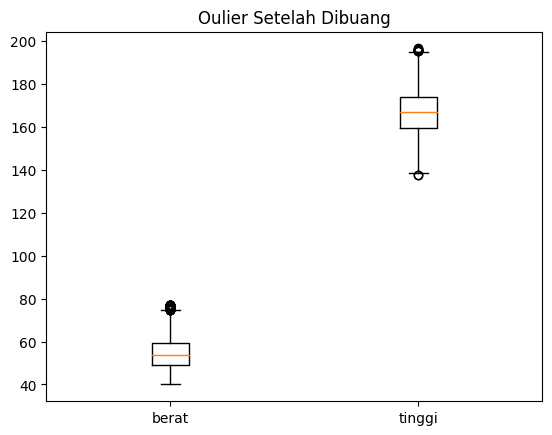

Jumlah baris tanpa outlier: 7338


In [18]:
kolom_numerik = ['berat', 'tinggi']
plt.boxplot(df[kolom_numerik])
plt.xticks([1, 2], kolom_numerik)
plt.title('Oulier Setelah Dibuang')
plt.show()
print(f'Jumlah baris tanpa outlier: {df.shape[0]}')

In [19]:
df

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,52.0,Laki-laki,PNS,Manokwari,4.286318e+06,1.0,0.0,46.893444,169.880171,Deadbuoy,1.0,SMA,2.0,0.773141
7831,45.0,Laki-laki,PNS,Tanjungselor,8.646146e+06,1.0,0.0,53.878714,170.122857,Pantone,0.0,S1,2.0,0.604058
7832,24.0,Laki-laki,PNS,Jambi,6.850066e+06,1.0,0.0,64.171294,161.384804,Moonsilk,0.0,SMA,8.0,0.502413
7833,29.0,Laki-laki,Pegawai swasta,Palangkaraya,1.204960e+07,1.0,0.0,55.217752,179.602130,Pantone,1.0,SMA,6.0,0.562664


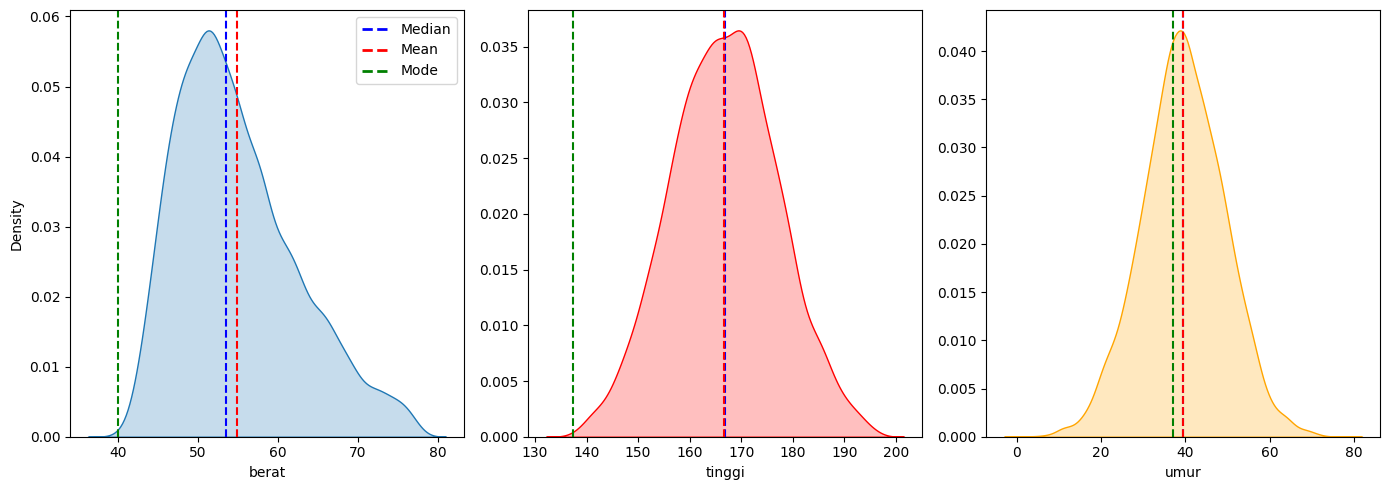

In [20]:
from matplotlib.lines import Line2D

fig, axs = plt.subplots(1, 3, figsize=(14,5))

sns.kdeplot(data=df, x='berat', ax=axs[0], fill=True)
axs[0].axvline(x=df.berat.median(), color='blue', ls='--', lw=1.5)
axs[0].axvline(x=df.berat.mean(), color='red', ls='--', lw=1.5)
axs[0].axvline(x=df.berat.mode()[0], color='green', ls='--', lw=1.5)

colors = ['blue', 'red', 'green']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='--') for c in colors]
labels = ['Median', 'Mean', 'Mode']
axs[0].legend(lines, labels)

sns.kdeplot(data=df, x='tinggi', ax=axs[1], fill=True, color='red')
axs[1].axvline(x=df.tinggi.median(), color='blue', ls='--', lw=1.5)
axs[1].axvline(x=df.tinggi.mean(), color='red', ls='--', lw=1.5)
axs[1].axvline(x=df.tinggi.mode()[0], color='green', ls='--', lw=1.5)
axs[1].set_ylabel('')

axs[1].annotate('Median dan mean', xy=(156.2, 0.0663), xytext=(141.1, 0.0579), arrowprops = dict(arrowstyle = '->', color='black'), fontsize=10)

sns.kdeplot(data=df, x='umur', ax=axs[2], fill=True, color='orange')
axs[2].axvline(x=df.umur.median(), color='blue', ls='--', lw=1.5)
axs[2].axvline(x=df.umur.mean(), color='red', ls='--', lw=1.5)
axs[2].axvline(x=df.umur.mode()[0], color='green', ls='--', lw=1.5)
axs[2].set_ylabel('')

plt.tight_layout()
plt.show()

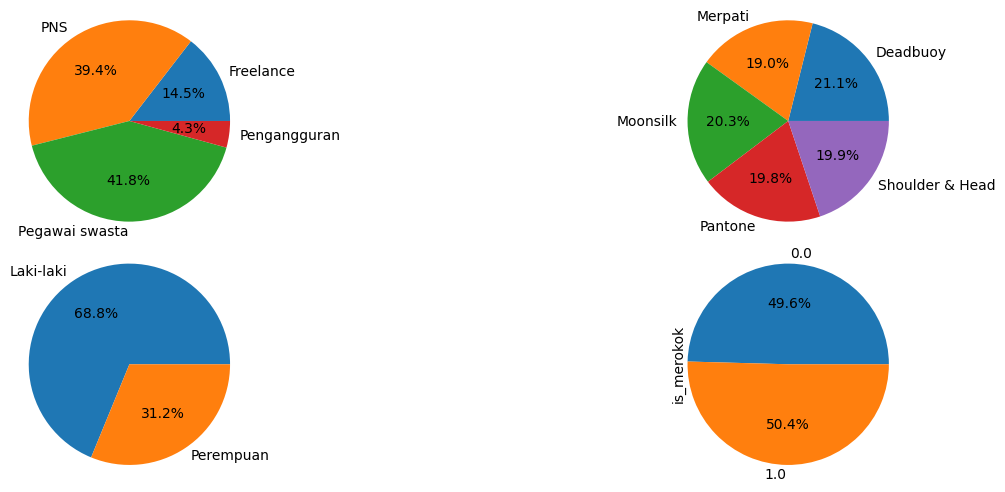

In [21]:
fig2, axs2 = plt.subplots(2,2, figsize=(15,5))

df.groupby('pekerjaan').size().plot(kind='pie', ax=axs2[0,0], autopct = '%.1f%%', radius=1.3)
df.groupby('sampo').size().plot(kind='pie', ax=axs2[0,1], autopct = '%.1f%%', radius=1.3)
df.groupby('jenis_kelamin').size().plot(kind='pie', ax=axs2[1,0], autopct = '%.1f%%', radius=1.3)
df.groupby('is_merokok').size().plot(kind='pie', ax=axs2[1,1], autopct = '%.1f%%', radius=1.3)

axs2[0,0].set_ylabel('')
axs2[0,1].set_ylabel('')
axs2[1,0].set_ylabel('')
axs2[1,1].set_ylabel('is_merokok')
plt.tight_layout()
plt.show()

In [22]:
prob_botak_70 = df[df['botak_prob'] >= 0.7]

In [23]:
prob_botak_70

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
5,55.0,Perempuan,PNS,Palangkaraya,9.213032e+06,1.0,1.0,54.287045,179.235145,Pantone,0.0,S1,1.0,0.732562
14,45.0,Laki-laki,PNS,Tanjung Pinang,1.211718e+07,1.0,1.0,54.548239,167.855936,Moonsilk,1.0,S1,3.0,1.000000
17,54.0,Laki-laki,Pegawai swasta,Mamuju,1.147456e+07,1.0,0.0,69.381971,175.132923,Pantone,1.0,S1,6.0,0.759691
19,38.0,Laki-laki,Pengangguran,Banda Aceh,1.087815e+07,1.0,0.0,53.103794,187.817838,Deadbuoy,0.0,S1,9.0,0.931565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7821,22.0,Laki-laki,PNS,Jakarta,3.206320e+06,1.0,1.0,49.986943,179.078973,Pantone,1.0,S1,3.0,0.771153
7822,39.0,Laki-laki,PNS,Mataram,2.121212e+07,1.0,1.0,54.849779,170.031729,Pantone,1.0,S1,5.0,0.852911
7824,45.0,Laki-laki,PNS,Jambi,5.398506e+06,1.0,0.0,48.060396,163.335322,Shoulder & Head,0.0,S1,9.0,0.735937
7826,42.0,Laki-laki,PNS,Pontianak,4.282852e+06,1.0,1.0,71.913849,171.811292,Shoulder & Head,1.0,S1,5.0,0.921812


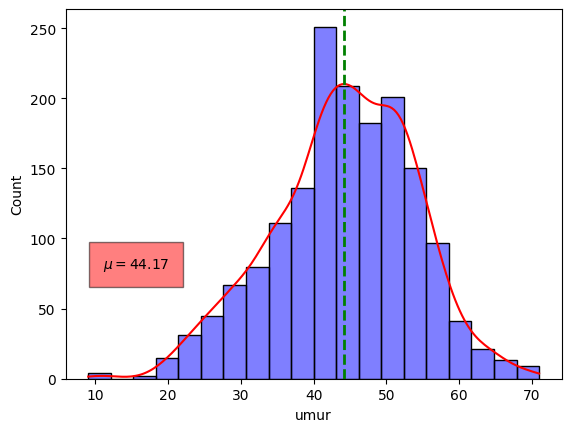

In [24]:
fig3, axs3 = plt.subplots()
sns.histplot(prob_botak_70, x='umur', bins=20, color='blue', alpha=0.5, kde=True, ax=axs3)
axs3.lines[0].set_color('red')
axs3.axvline(x=prob_botak_70.umur.mean(), color='green', ls='--', lw=2)
axs3.text(11, 79, r'$\mu={}$'.format('%.2f' % prob_botak_70['umur'].mean()), style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.show()

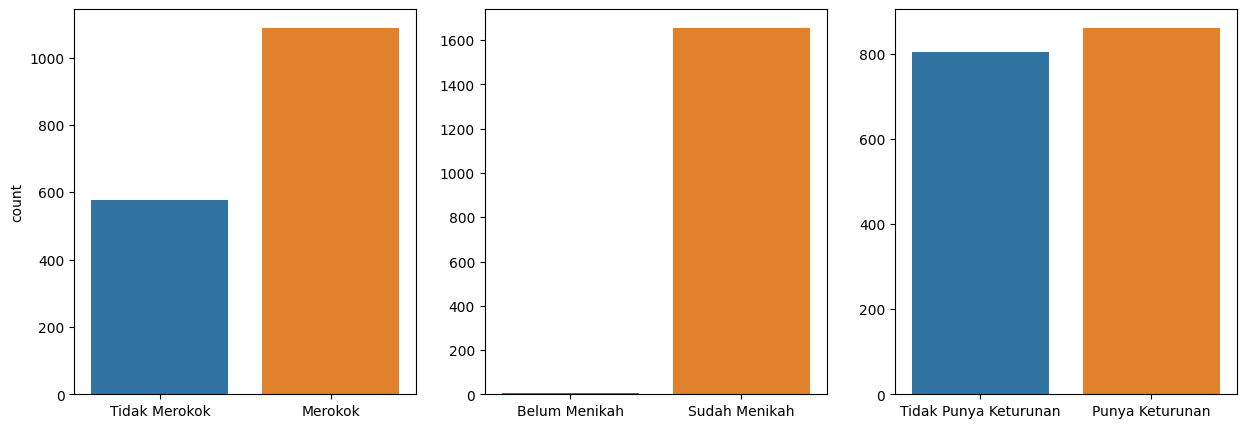

In [25]:
fig4, axs4 = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(data=prob_botak_70, x='is_merokok', ax=axs4[0])
axs4[0].set_xticks([0,1], ['Tidak Merokok', 'Merokok'])
axs4[0].set_xlabel('')

sns.countplot(data=prob_botak_70, x='is_menikah', ax=axs4[1])
axs4[1].set_xticks([0,1], ['Belum Menikah', 'Sudah Menikah'])
axs4[1].set_xlabel('')
axs4[1].set_ylabel('')

sns.countplot(data=prob_botak_70, x='is_keturunan', ax=axs4[2])
axs4[2].set_xticks([0,1], ['Tidak Punya Keturunan', 'Punya Keturunan'])
axs4[2].set_xlabel('')
axs4[2].set_ylabel('')

plt.show()

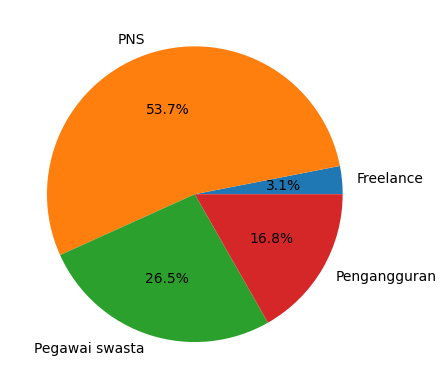

In [26]:
prob_botak_70.groupby('pekerjaan').size().plot(kind='pie', autopct='%.1f%%')
plt.ylabel('')
plt.show()

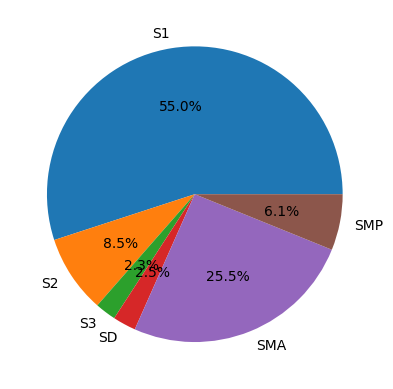

In [27]:
prob_botak_70.groupby('pendidikan').size().plot(kind='pie', autopct='%.1f%%')
plt.ylabel('')
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
df['berat'] = MinMaxScaler().fit_transform(df['berat'].values.reshape(len(df), 1))
df['tinggi'] = MinMaxScaler().fit_transform(df['tinggi'].values.reshape(len(df), 1))

<ipython-input-29-5597d230c516>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['berat'] = MinMaxScaler().fit_transform(df['berat'].values.reshape(len(df), 1))
<ipython-input-29-5597d230c516>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tinggi'] = MinMaxScaler().fit_transform(df['tinggi'].values.reshape(len(df), 1))


In [30]:
df

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,0.384661,0.560380,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,0.883344,0.477350,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,0.169866,0.292072,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,0.310086,0.508037,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,0.556954,0.477090,Merpati,1.0,S2,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,52.0,Laki-laki,PNS,Manokwari,4.286318e+06,1.0,0.0,0.185234,0.551085,Deadbuoy,1.0,SMA,2.0,0.773141
7831,45.0,Laki-laki,PNS,Tanjungselor,8.646146e+06,1.0,0.0,0.372936,0.555199,Pantone,0.0,S1,2.0,0.604058
7832,24.0,Laki-laki,PNS,Jambi,6.850066e+06,1.0,0.0,0.649509,0.407086,Moonsilk,0.0,SMA,8.0,0.502413
7833,29.0,Laki-laki,Pegawai swasta,Palangkaraya,1.204960e+07,1.0,0.0,0.408917,0.715874,Pantone,1.0,SMA,6.0,0.562664


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
df['umur'] = StandardScaler().fit_transform(df['umur'].values.reshape(len(df), 1))
df['gaji'] = StandardScaler().fit_transform(df['gaji'].values.reshape(len(df), 1))

<ipython-input-32-6a773482c116>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['umur'] = StandardScaler().fit_transform(df['umur'].values.reshape(len(df), 1))
<ipython-input-32-6a773482c116>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gaji'] = StandardScaler().fit_transform(df['gaji'].values.reshape(len(df), 1))


In [33]:
df

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,-1.273601,Perempuan,PNS,Bengkulu,-0.195209,1.0,0.0,0.384661,0.560380,Pantone,1.0,S1,5.0,0.605974
1,1.375506,Perempuan,PNS,Bandung,-0.268372,1.0,0.0,0.883344,0.477350,Pantone,0.0,S1,7.0,0.532860
2,-0.254714,Perempuan,Pegawai swasta,Bandung,-0.492831,1.0,0.0,0.169866,0.292072,Moonsilk,0.0,S1,4.0,0.418442
3,-0.356603,Perempuan,Pengangguran,Palu,-1.172211,1.0,0.0,0.310086,0.508037,Deadbuoy,1.0,SD,9.0,0.804050
4,-0.152825,Laki-laki,Freelance,Palangkaraya,-0.629444,1.0,0.0,0.556954,0.477090,Merpati,1.0,S2,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1.273618,Laki-laki,PNS,Manokwari,-1.023054,1.0,0.0,0.185234,0.551085,Deadbuoy,1.0,SMA,2.0,0.773141
7831,0.560396,Laki-laki,PNS,Tanjungselor,-0.039907,1.0,0.0,0.372936,0.555199,Pantone,0.0,S1,2.0,0.604058
7832,-1.579268,Laki-laki,PNS,Jambi,-0.444926,1.0,0.0,0.649509,0.407086,Moonsilk,0.0,SMA,8.0,0.502413
7833,-1.069824,Laki-laki,Pegawai swasta,Palangkaraya,0.727576,1.0,0.0,0.408917,0.715874,Pantone,1.0,SMA,6.0,0.562664


In [34]:
df_onehot = pd.get_dummies(df, columns=['jenis_kelamin', 'pekerjaan', 'provinsi', 'sampo', 'pendidikan'])

In [35]:
df_onehot

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,botak_prob,jenis_kelamin_Laki-laki,...,sampo_Merpati,sampo_Moonsilk,sampo_Pantone,sampo_Shoulder & Head,pendidikan_S1,pendidikan_S2,pendidikan_S3,pendidikan_SD,pendidikan_SMA,pendidikan_SMP
0,-1.273601,-0.195209,1.0,0.0,0.384661,0.560380,1.0,5.0,0.605974,0,...,0,0,1,0,1,0,0,0,0,0
1,1.375506,-0.268372,1.0,0.0,0.883344,0.477350,0.0,7.0,0.532860,0,...,0,0,1,0,1,0,0,0,0,0
2,-0.254714,-0.492831,1.0,0.0,0.169866,0.292072,0.0,4.0,0.418442,0,...,0,1,0,0,1,0,0,0,0,0
3,-0.356603,-1.172211,1.0,0.0,0.310086,0.508037,1.0,9.0,0.804050,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.152825,-0.629444,1.0,0.0,0.556954,0.477090,1.0,1.0,0.368371,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1.273618,-1.023054,1.0,0.0,0.185234,0.551085,1.0,2.0,0.773141,1,...,0,0,0,0,0,0,0,0,1,0
7831,0.560396,-0.039907,1.0,0.0,0.372936,0.555199,0.0,2.0,0.604058,1,...,0,0,1,0,1,0,0,0,0,0
7832,-1.579268,-0.444926,1.0,0.0,0.649509,0.407086,0.0,8.0,0.502413,1,...,0,1,0,0,0,0,0,0,1,0
7833,-1.069824,0.727576,1.0,0.0,0.408917,0.715874,1.0,6.0,0.562664,1,...,0,0,1,0,0,0,0,0,1,0


In [36]:
df_onehot = df_onehot.dropna()

In [37]:
X = df_onehot.drop('botak_prob', axis=1)
y = df_onehot['botak_prob']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
test_predictions = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)

In [45]:
print(MAE, MSE)

0.052343741177478524 0.005140031304703986


In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_feature = polynomial_converter.fit_transform(X)

In [48]:
poly_feature

array([[-1.27360147, -0.19520858,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.37550641, -0.26837243,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.25471383, -0.4928313 ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.57926777, -0.44492551,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.06982394,  0.72757601,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.25473   , -0.88731991,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=101)

In [50]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [51]:
test_predictions = model.predict(X_test)
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
print(MAE, MSE)

116572.57476394568 14961656396378.201


In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, test_predictions)
print(r2)

-500472169461100.6


In [53]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_feature = polynomial_converter.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=101)

In [55]:
X_train

array([[-1.57926777,  0.3408103 ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.0509363 , -0.4452212 ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.06984011,  0.38337706,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.17171271,  1.38191357,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.45849136, -0.39468851,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45850752,  0.48203068,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [56]:
from sklearn.linear_model import Ridge

In [57]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
test_predictions = ridge_model.predict(X_test)

In [58]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
print(MAE, MSE)

0.06493123729837147 0.007982854848265619


In [59]:
from sklearn.linear_model import RidgeCV

In [60]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [61]:
test_predictions = ridge_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
print(MAE, MSE)

0.06493123729826487 0.007982854848349697


In [62]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], tol=0.01)
elastic_model.fit(X_train, y_train)

In [ ]:
test_predictions = ridge_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
print(MAE, MSE)